In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
online_retail=pd.read_excel('Online Retail.xlsx')

In [ ]:
# check basic information

In [40]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
4,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom


In [ ]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# time span in this dataset
print(online_retail['InvoiceDate'].min(),online_retail['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [ ]:
# numeric values overview
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# there is negative values in 'quantity', assume it's caused by invoice cancellation, so further check records on this status
online_retail[online_retail['InvoiceNo'].astype(str).str[0]=='C'].describe()

,Quantity,UnitPrice,CustomerID
count,9288.000000,9288.000000,8905.000000
mean,-29.885228,48.393661,14991.667266
std,1145.786965,666.600430,1706.772357
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13510.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,5.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [ ]:
online_retail[online_retail['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541908,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
online_retail[online_retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
531285,C571707,10135,COLOURING PENCILS BROWN TUBE,-1,2011-10-18 15:33:00,1.25,14056.0,United Kingdom
531286,C537043,11001,ASSTD DESIGN RACING CAR PEN,-1,2010-12-05 10:48:00,1.69,15351.0,United Kingdom
531287,C568412,11001,ASSTD DESIGN RACING CAR PEN,-1,2011-09-27 10:54:00,1.69,14456.0,United Kingdom
531288,C575257,11001,ASSTD DESIGN RACING CAR PEN,-1,2011-11-09 11:59:00,1.69,13623.0,United Kingdom
531289,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,2011-05-22 13:27:00,0.21,15555.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
541905,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
541906,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
541907,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [ ]:
# check invoice with negative unitprice
online_retail[online_retail['UnitPrice']==-11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
529823,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
529824,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [41]:
online_retail[online_retail['Description']=='Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
529822,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
529823,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
529824,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
online_retail[online_retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
529823,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
529824,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
# check records with null value: from the table info, I found the null value are only in two columns: Description and CustomerID

In [ ]:
online_retail[online_retail['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.0,NaN,United Kingdom
6,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
11,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.0,NaN,United Kingdom
13,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
18,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541901,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom
541902,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,NaN,United Kingdom
541903,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,NaN,United Kingdom
541905,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom


In [ ]:
online_retail[online_retail['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.0,NaN,United Kingdom
18,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
79,543258,84611B,NaN,1287,2011-02-04 16:06:00,0.0,NaN,United Kingdom
127,547966,DOT,NaN,1000,2011-03-28 15:49:00,0.0,NaN,United Kingdom
128,540699,POST,NaN,1000,2011-01-11 09:32:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541845,540241,35957,NaN,-939,2011-01-05 15:17:00,0.0,NaN,United Kingdom
541853,550133,85099F,NaN,-1092,2011-04-14 13:49:00,0.0,NaN,United Kingdom
541894,560600,18007,NaN,-2834,2011-07-19 17:04:00,0.0,NaN,United Kingdom
541899,565304,16259,NaN,-3167,2011-09-02 12:18:00,0.0,NaN,United Kingdom


In [ ]:
print(online_retail[online_retail['Description'].isnull()]['UnitPrice'].min(),online_retail[online_retail['Description'].isnull()]['UnitPrice'].max())

0.0 0.0


In [44]:
print(online_retail[online_retail['Description'].isnull()]['CustomerID'].min(),online_retail[online_retail['Description'].isnull()]['CustomerID'].max())

nan nan


In [45]:
online_retail[online_retail['Description'].isnull()][online_retail['CustomerID'].notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# the records with null values in 'CustomerID' is kept for sales analysis because 

In [65]:
retail_noC=online_retail[online_retail['InvoiceNo'].astype(str).str[0]!='C']

In [66]:
retail_noC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541906
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


In [67]:
retail_noC[retail_noC['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.0,NaN,United Kingdom
18,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
79,543258,84611B,NaN,1287,2011-02-04 16:06:00,0.0,NaN,United Kingdom
127,547966,DOT,NaN,1000,2011-03-28 15:49:00,0.0,NaN,United Kingdom
128,540699,POST,NaN,1000,2011-01-11 09:32:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541845,540241,35957,NaN,-939,2011-01-05 15:17:00,0.0,NaN,United Kingdom
541853,550133,85099F,NaN,-1092,2011-04-14 13:49:00,0.0,NaN,United Kingdom
541894,560600,18007,NaN,-2834,2011-07-19 17:04:00,0.0,NaN,United Kingdom
541899,565304,16259,NaN,-3167,2011-09-02 12:18:00,0.0,NaN,United Kingdom


In [72]:
online_retail[online_retail['InvoiceNo'].astype(str).str[:]=='571707']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Sales revenue analysis

In [73]:
online_retail['total_sale']=online_retail['Quantity']*online_retail['UnitPrice']

In [81]:
sales_conuntry=online_retail.groupby('Country')['total_sale'].sum().to_frame()
sales_conuntry.columns=['country_total']
sales_conuntry.reset_index(inplace=True)
sales_conuntry=sales_conuntry.sort_values('country_total',ascending=False)

In [89]:
sales_conuntry.head()

,Country,country_total
36,United Kingdom,8.187806e+06
24,Netherlands,2.846615e+05
10,EIRE,2.632768e+05
14,Germany,2.216982e+05
13,France,1.974039e+05


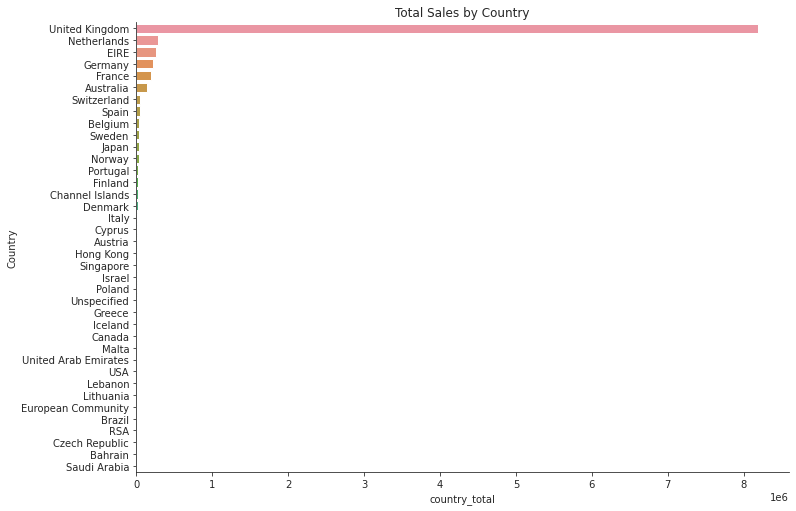

In [86]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='country_total',y='Country',data=sales_conuntry, ax=ax,order=sales_conuntry.sort_values('country_total',ascending=False).Country)    
sns.despine()
plt.title('Total Sales by Country')
fig.savefig('example.png')

In [91]:
sales_conuntry[sales_conuntry['Country']=='Saudi Arabia']

,Country,country_total
29,Saudi Arabia,131.17


In [ ]:
# It's not hard to conclude that United Kindom is the top 1 customer, 
# and the scale of sales for the first 6 contries are much larger than that of countries like Saudi Arabia

In [100]:
online_retail['date']=online_retail['InvoiceDate'].dt.strftime('%Y-%m')

In [101]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,date
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011-12
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.0,2011-11
3,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom,0.0,2011-01
4,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.0,2011-10


In [103]:
sales_ctry_month=online_retail.groupby(['Country','date'])['total_sale'].sum().to_frame()
sales_ctry_month.columns=['monthly_total']
sales_ctry_month.reset_index(inplace=True)

In [104]:
sales_ctry_month.head()

,Country,date,monthly_total
0,Australia,2010-12,1005.10
1,Australia,2011-01,9017.71
2,Australia,2011-02,14627.47
3,Australia,2011-03,17055.29
4,Australia,2011-04,333.40


In [108]:
country=list(online_retail['Country'].unique())

In [154]:
sales_ctry_month3=sales_ctry_month[sales_ctry_month['Country']=='United Kingdom']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


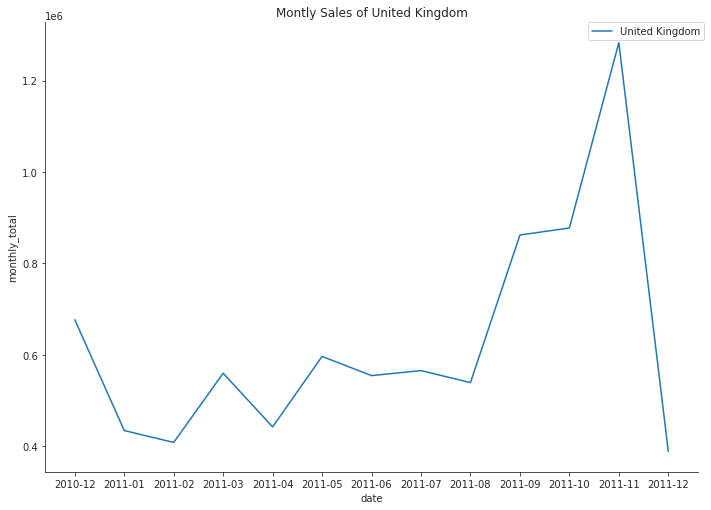

In [256]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.lineplot('date', 'monthly_total', ci=None, 
             hue='Country', data=sales_ctry_month3)
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Montly Sales of United Kingdom')
fig.savefig('example.png')

In [150]:
sales_ctry_month4=sales_ctry_month[sales_ctry_month['Country'].isin(['Netherlands','EIRE','Germany','France','Australia'])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


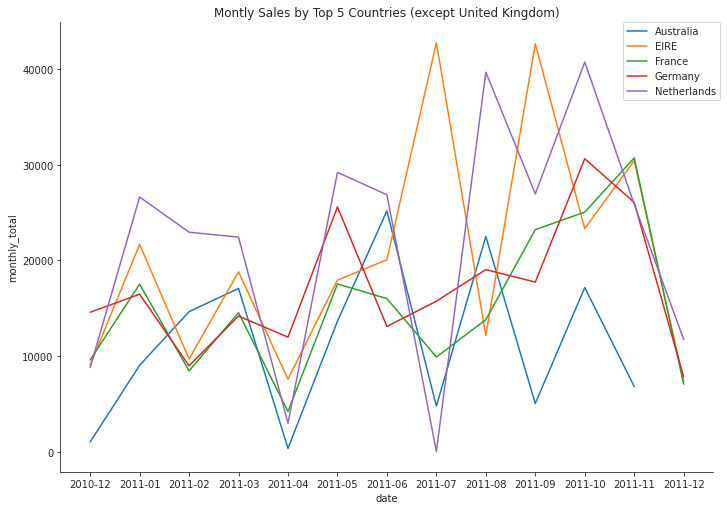

In [259]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.lineplot('date', 'monthly_total', ci=None, 
             hue='Country', data=sales_ctry_month4)
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Montly Sales by Top 5 Countries (except United Kingdom)')
fig.savefig('example.png')

In [152]:
sales_ctry_month5=sales_ctry_month[~sales_ctry_month['Country'].isin(['United Kingdom','Netherlands','EIRE','Germany','France','Australia'])]

In [317]:
sales_ctry_month5=sales_ctry_month5.sort_values('date')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


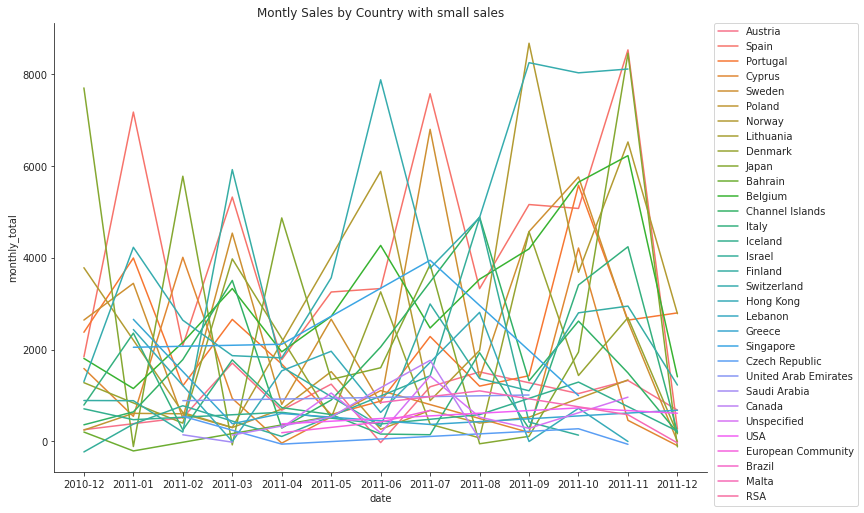

In [318]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.lineplot('date', 'monthly_total', ci=None, 
             hue='Country', data=sales_ctry_month5)
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Montly Sales by Country with small sales')
fig.savefig('example.png')

In [ ]:
# Customer purchasing analysis
# because this part is mainly focused on purchasing behavior, I only include the records with postive 'Quantity' and 'UnitPrice"

In [ ]:
# for those records that have UnitPrice as 0, some have positive quantity and some have negative quantity
# I assume that the ones with positive quantity could be 'Giveaway', while the ones with negative quantity has something wrong with transactio
# and both of them should not include as in initiative purchasing analysis
# so in this part, I only 

In [163]:
online_retail2=online_retail[(online_retail['UnitPrice']>0) & (online_retail['Quantity']>0)]

In [164]:
online_retail2.groupby(['Country','InvoiceNo'])['total_sale'].sum()

Country      InvoiceNo
Australia    536389        358.25
             537676        258.90
             539419        415.70
             540267       7011.38
             540280        143.00
                           ...   
Unspecified  563947        252.90
             564051        278.13
             565303        286.85
             576646        333.20
             578539        632.55
Name: total_sale, Length: 19960, dtype: float64

In [240]:
purchase_country=online_retail2.groupby(['Country','InvoiceNo'])['total_sale'].sum().to_frame()
purchase_country.columns=['each_invoice_total']
purchase_country.reset_index(inplace=True)

In [241]:
purchase_country.head()

,Country,InvoiceNo,each_invoice_total
0,Australia,536389,358.25
1,Australia,537676,258.90
2,Australia,539419,415.70
3,Australia,540267,7011.38
4,Australia,540280,143.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


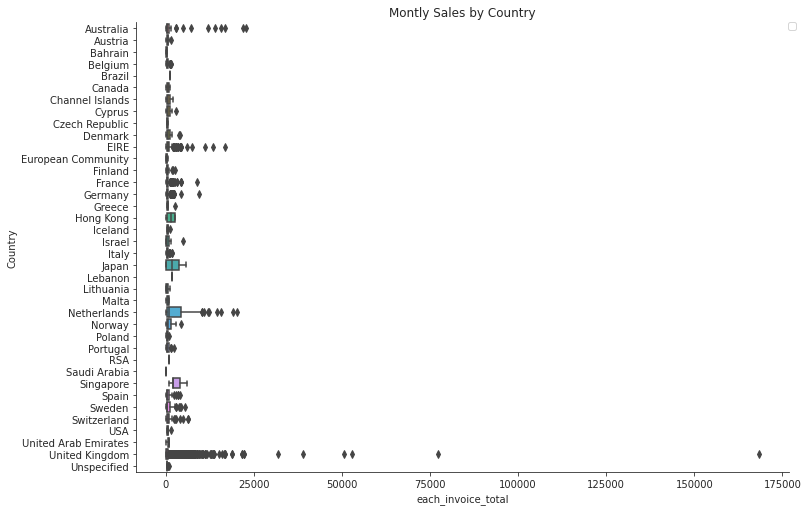

In [248]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot('each_invoice_total', 'Country', data=purchase_country)
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Montly Sales by Country')
fig.savefig('example.png')

In [199]:
purchase_cnt_mean=purchase_country.groupby('Country').agg({'InvoiceNo':'count','invoice_total':'mean'})
purchase_cnt_mean.columns=['invoice_count','Avg_invoice_amount']
purchase_cnt_mean.reset_index(inplace=True)

In [207]:
purchase_cnt_mean.head()

,Country,invoice_count,Avg_invoice_amount
0,Australia,57,2430.198421
1,Austria,17,599.922353
2,Bahrain,3,251.380000
3,Belgium,98,420.370816
4,Brazil,1,1143.600000


In [ ]:
#Because the gap of the scales of invoice_count and average_invoice_amount is very big, I plot them separetely and then use loged value
# to see the comparison results

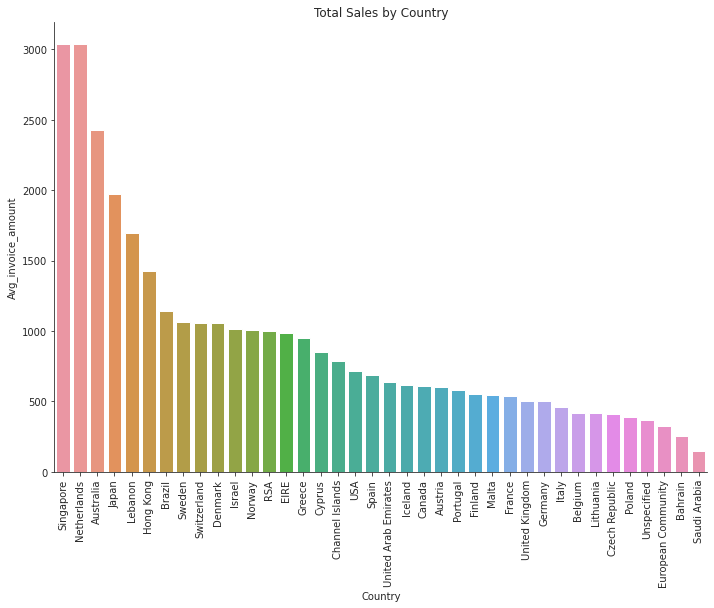

In [225]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(y='Avg_invoice_amount',x='Country',data=purchase_cnt_mean, ax=ax,order=purchase_cnt_mean.sort_values('Avg_invoice_amount',ascending=False).Country)    
sns.despine()
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
fig.savefig('example.png')

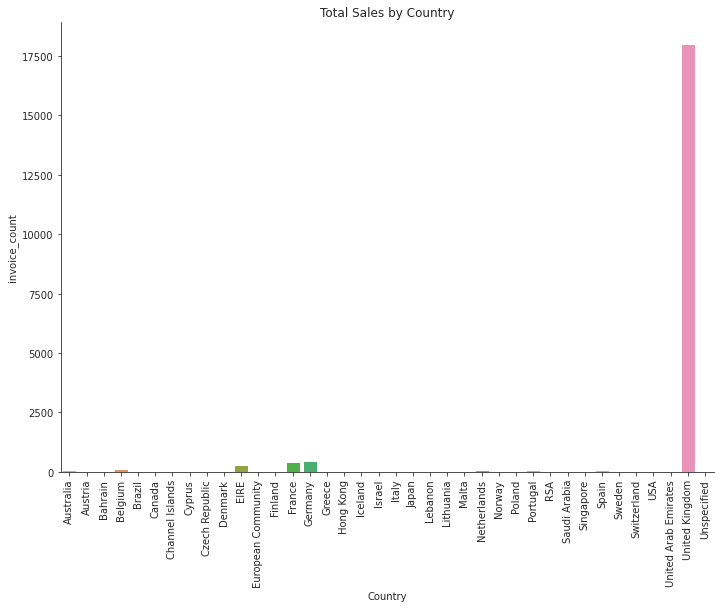

In [229]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(y='invoice_count',x='Country',data=purchase_cnt_mean, ax=ax)    
sns.despine()
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
fig.savefig('example.png')

In [235]:
df=purchase_cnt_mean.melt('Country', var_name='a', value_name='b')
df['log_b']=np.log(df['b'])

In [236]:
df.head()

,Country,a,b,log_b
0,Australia,invoice_count,57.0,4.043051
1,Austria,invoice_count,17.0,2.833213
2,Bahrain,invoice_count,3.0,1.098612
3,Belgium,invoice_count,98.0,4.584967
4,Brazil,invoice_count,1.0,0.000000


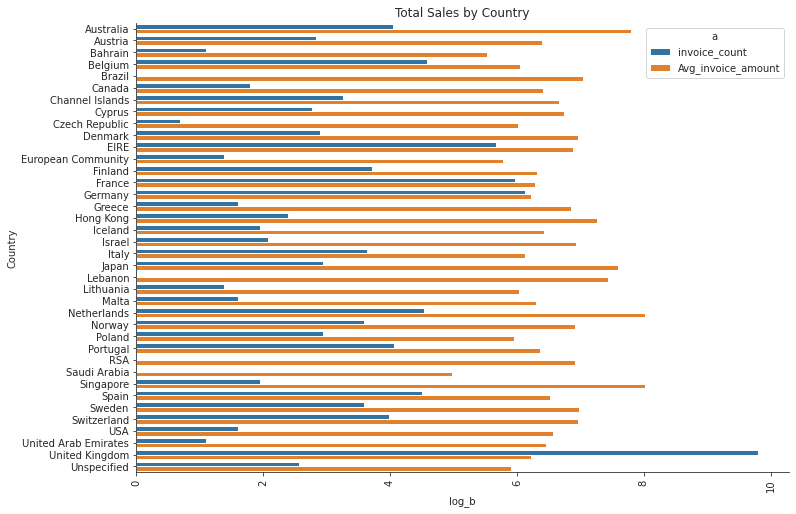

In [250]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(y='Country', x='log_b', data=df, hue='a')
sns.despine()
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
fig.savefig('example.png')

In [ ]:
# part3: Invoice Cancellation analysis
# I assume the invoice cancellation is related to order cancellation, so I'd like to have a check on this part

In [290]:
retail_Cancel=online_retail[online_retail['InvoiceNo'].astype(str).str[0]=='C']

In [277]:
retail_Cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sale,date
531285,C571707,10135,COLOURING PENCILS BROWN TUBE,-1,2011-10-18 15:33:00,1.25,14056.0,United Kingdom,-1.25,2011-10
531286,C537043,11001,ASSTD DESIGN RACING CAR PEN,-1,2010-12-05 10:48:00,1.69,15351.0,United Kingdom,-1.69,2010-12
531287,C568412,11001,ASSTD DESIGN RACING CAR PEN,-1,2011-09-27 10:54:00,1.69,14456.0,United Kingdom,-1.69,2011-09
531288,C575257,11001,ASSTD DESIGN RACING CAR PEN,-1,2011-11-09 11:59:00,1.69,13623.0,United Kingdom,-1.69,2011-11
531289,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,2011-05-22 13:27:00,0.21,15555.0,United Kingdom,-0.21,2011-05


In [263]:
retail_Cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 531285 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9288 non-null   object        
 1   StockCode    9288 non-null   object        
 2   Description  9288 non-null   object        
 3   Quantity     9288 non-null   int64         
 4   InvoiceDate  9288 non-null   datetime64[ns]
 5   UnitPrice    9288 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      9288 non-null   object        
 8   total_sale   9288 non-null   float64       
 9   date         9288 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 798.2+ KB


In [291]:
retail_Cancel=retail_Cancel.groupby(['Country','InvoiceNo'])['total_sale'].sum().to_frame()


In [292]:
retail_Cancel.columns=['Cancel_Invoce_total']
retail_Cancel.reset_index(inplace=True)

In [293]:
retail_Cancel.head()

,Country,InvoiceNo,Cancel_Invoce_total
0,Australia,C538723,-27.75
1,Australia,C543375,-67.95
2,Australia,C545525,-168.70
3,Australia,C548729,-13.20
4,Australia,C551348,-425.00


In [294]:
retail_Cancel2=retail_Cancel.groupby('Country').agg({'InvoiceNo':'count','Cancel_Invoce_total':'sum'})
retail_Cancel2.columns=['Cancel_Invoice_cnt','Cancel_Invoice_total']
retail_Cancel2.reset_index(inplace=True)

In [295]:
retail_Cancel2.head()

,Country,Cancel_Invoice_cnt,Cancel_Invoice_total
0,Australia,12,-1444.04
1,Austria,2,-44.36
2,Bahrain,1,-205.74
3,Belgium,21,-285.38
4,Channel Islands,7,-364.15


In [298]:
retail_Cancel2.sort_values(['Cancel_Invoice_cnt'],ascending=False)

,Country,Cancel_Invoice_cnt,Cancel_Invoice_total
29,United Kingdom,3372,-815291.60
12,Germany,146,-7168.93
8,EIRE,72,-20177.14
11,France,69,-12311.21
3,Belgium,21,-285.38
27,Switzerland,20,-704.55
16,Italy,17,-592.73
25,Spain,15,-6802.53
22,Portugal,13,-4380.08
0,Australia,12,-1444.04


In [ ]:
retail_all=online_retail.groupby('Country')['total_sale'].sum().to_frame()
sales_conuntry.columns=['country_total']
sales_conuntry.reset_index(inplace=True)
sales_conuntry=sales_conuntry.sort_values('country_total',ascending=False)

In [300]:
retail_all=online_retail.groupby(['Country','InvoiceNo'])['total_sale'].sum().to_frame()
retail_all.columns=['Invoce_total']
retail_all.reset_index(inplace=True)

In [302]:
retail_all2=retail_all.groupby('Country').agg({'InvoiceNo':'count','Invoce_total':'sum'})
retail_all2.columns=['Invoice_cnt_all','Invoice_total_all']
retail_all2.reset_index(inplace=True)

In [303]:
retail_all2.head()

,Country,Invoice_cnt_all,Invoice_total_all
0,Australia,69,137077.27
1,Austria,19,10154.32
2,Bahrain,4,548.40
3,Belgium,119,40910.96
4,Brazil,1,1143.60


In [304]:
retail_all2.sort_values(['Invoice_cnt_all'],ascending=False)

,Country,Invoice_cnt_all,Invoice_total_all
36,United Kingdom,23494,8187806.364
14,Germany,603,221698.210
13,France,461,197403.900
10,EIRE,360,263276.820
3,Belgium,119,40910.960
31,Spain,105,54774.580
24,Netherlands,101,284661.540
33,Switzerland,74,56385.350
27,Portugal,71,29367.020
0,Australia,69,137077.270


In [305]:
combined_retail=pd.merge(retail_all2,retail_Cancel2,how='left',on='Country')
combined_retail=combined_retail.fillna(0)

In [309]:
combined_retail['Cancelled_invoice_cnt_percentage']=combined_retail['Cancel_Invoice_cnt']/combined_retail['Invoice_cnt_all']
combined_retail['Cancelled_invoice_amount_percentage']=combined_retail['Cancel_Invoice_total']/combined_retail['Invoice_total_all']

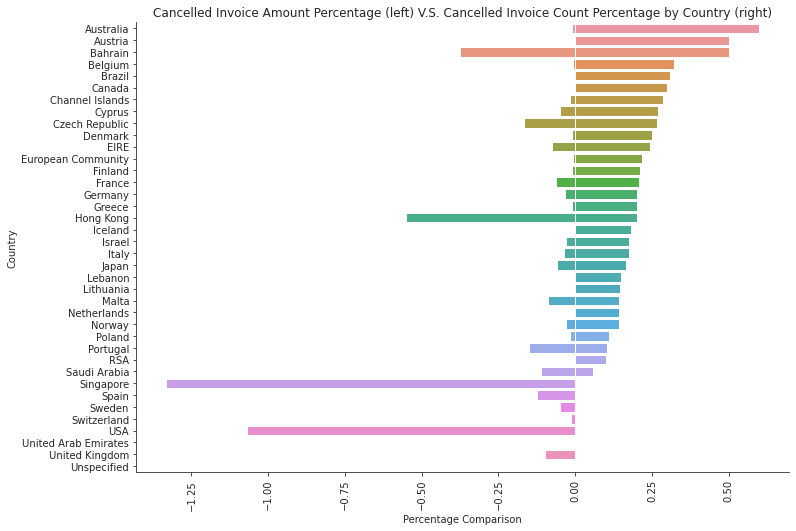

In [320]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Cancelled_invoice_cnt_percentage',y='Country',data=combined_retail, ax=ax,order=combined_retail.sort_values('Cancelled_invoice_cnt_percentage',ascending=False).Country)
sns.barplot(x='Cancelled_invoice_amount_percentage',y='Country',data=combined_retail)    
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Percentage Comparison')
plt.title('Cancelled Invoice Amount Percentage (left) V.S. Cancelled Invoice Count Percentage by Country (right)')
fig.savefig('example.png')